In [14]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from pre_processing.textProcessing import TextPreProcessor
import nltk
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from matplotlib import pyplot as plt
# nltk.download('omw-1.4')

## Read Data

In [5]:
train = pd.read_csv('../data/train.csv')
# Sample 1000 to experiment with
train_samp = train.sample(1000, random_state=923).reset_index(drop=True)

In [6]:
train_samp
doc = train_samp.comment_text

### Process a single document 

For each doc, I recommend processing like follows

In [7]:
def tokenize(text):
    """
    Define a function that take in a text and process the doc
    """
    return TextPreProcessor(text=text, lemma_flag=True, stem_flag=False).process()

target_doc = doc[0]
print('---Original Doc---')
print(target_doc)

print('\n\n---Processed Doc---')
print(tokenize(target_doc))

---Original Doc---
"

 You're a liar and on ArbCom, what a shock 

I know within the bubble of Wikiality (""I don't really have a problem with it."" - porn magnate and Randroid Jimbo Wales) no one has a problem with a fantastic liar to you being on ArbCom, but I guess some of that...*real*-ity and outside world crept in and now you have been thrown overboard.  Wikipedia's descent continues.

I expect this comment will be deleted by some cultish cabal'er.  I'm counting the minutes!  "


---Processed Doc---
['liar', 'arbcom', 'shock', 'know', 'within', 'bubble', 'wikiality', 'really', 'problem', 'porn', 'magnate', 'randroid', 'jimbo', 'wale', 'one', 'problem', 'fantastic', 'liar', 'arbcom', 'guess', 'thatreality', 'outside', 'world', 'creep', 'throw', 'overboard', 'wikipedias', 'descent', 'continue', 'expect', 'comment', 'delete', 'cultish', 'cabaler', 'count', 'minute']


# Process text for feature-based modeling
1. Process each document
2. Turn the documents into a Document-term matrix

In [8]:
# Fit the Count vectorizer
vec_count = CountVectorizer(ngram_range=(1,1),tokenizer=tokenize,min_df=15, max_df=0.9)
vec_count_f = vec_count.fit(doc)

/Users/xiaoma/envs/ds207/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [9]:
dtm = vec_count_f.transform(doc)
dtm_df = pd.DataFrame(dtm.toarray())
dtm_df.columns = vec_count_f.get_feature_names()

/Users/xiaoma/envs/ds207/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [10]:
dtm_df.head()

,1,2,2005,2006,2008,5,able,accept,account,accuse,...,without,word,work,world,would,write,wrong,year,yes,yet
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Process for Recurrent Neural Network
1. Process each doc
2. Turn each doc into a numeric representation
3. Do Padding

In [11]:
processed_docs = [tokenize(x) for x in doc]

# Create the tokenizer for NN processing
t = Tokenizer()
# Fit the tokenizer on the documents
t.fit_on_texts(processed_docs)
# Transform docs into numeric rep
encoded_docs = t.texts_to_sequences(processed_docs)

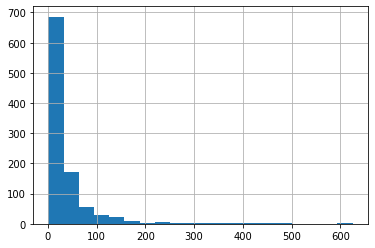

In [15]:
# Find the optimal lengths for padding
pd.Series(encoded_docs).apply(lambda x: len(x)).hist(bins = 20);

In [16]:
max_len = 150 # Most of the documents are less than length 150
padded_doc = pad_sequences(encoded_docs, maxlen = max_len, padding = 'post')

In [19]:
print("---Original text---")
print(doc[0])

print('\n---Processed text---')
print(processed_docs[0])

print('\n---Encoded text---')
print(encoded_docs[0])

print('\n---Padded text---')
print(padded_doc[0])

---Original text---
"

 You're a liar and on ArbCom, what a shock 

I know within the bubble of Wikiality (""I don't really have a problem with it."" - porn magnate and Randroid Jimbo Wales) no one has a problem with a fantastic liar to you being on ArbCom, but I guess some of that...*real*-ity and outside world crept in and now you have been thrown overboard.  Wikipedia's descent continues.

I expect this comment will be deleted by some cultish cabal'er.  I'm counting the minutes!  "

---Processed text---
['liar', 'arbcom', 'shock', 'know', 'within', 'bubble', 'wikiality', 'really', 'problem', 'porn', 'magnate', 'randroid', 'jimbo', 'wale', 'one', 'problem', 'fantastic', 'liar', 'arbcom', 'guess', 'thatreality', 'outside', 'world', 'creep', 'throw', 'overboard', 'wikipedias', 'descent', 'continue', 'expect', 'comment', 'delete', 'cultish', 'cabaler', 'count', 'minute']

---Encoded text---
[1030, 1418, 2324, 18, 609, 3535, 3536, 56, 123, 2325, 3537, 3538, 1419, 1420, 13, 123, 3539, 103

In [22]:
pd.DataFrame(padded_doc)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1030,1418,2324,18,609,3535,3536,56,123,2325,...,0,0,0,0,0,0,0,0,0,0
1,130,268,107,237,137,193,2327,1032,5,514,...,0,0,0,0,0,0,0,0,0,0
2,3547,137,38,611,364,3548,238,2329,21,515,...,0,0,0,0,0,0,0,0,0,0
3,1733,3550,249,3551,3552,1035,3553,3554,753,0,...,0,0,0,0,0,0,0,0,0,0
4,30,2331,1190,3555,3556,30,2331,1190,3557,50,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1450,21,333,170,10,275,1425,1,8244,8245,...,0,0,0,0,0,0,0,0,0,0
996,12,16,475,110,82,174,40,105,847,110,...,0,0,0,0,0,0,0,0,0,0
997,18,467,8249,643,91,27,3332,803,83,1086,...,0,0,0,0,0,0,0,0,0,0
998,1507,8254,17,8255,73,63,22,31,567,801,...,0,0,0,0,0,0,0,0,0,0
